## Dimensionality Reduction: Titanic Dataset
https://www.kaggle.com/c/titanic

** Dataset Information: **

891 passenger information aboard the Titanic

** Attribute Information: (9 features and 1 class)**


Variable	Definition	     Key
1. survival	Survival	     0 = No, 1 = Yes
2. pclass	Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	    Sex	
4. Age	    Age in years	
5. sibsp	# of siblings / spouses aboard the Titanic	
6. parch	# of parents / children aboard the Titanic	
7. ticket	Ticket number	
8. fare	    Passenger fare	
9. cabin	Cabin number	
10. embarked Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

** Objective of this project **

predict whether a passenger survived the sinking of the Titanic or not using compressed features with PCA

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('train.csv')

In [3]:
# Inspect Data
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df.shape

(891, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


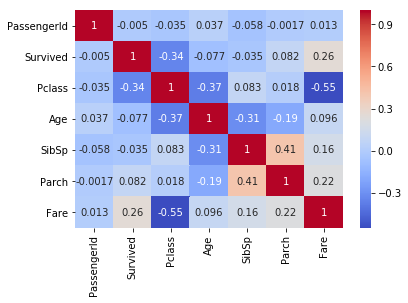

In [19]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

## Data preprocessing

** Missing Data **

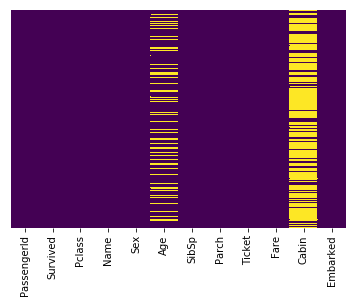

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

** Clean Data **

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


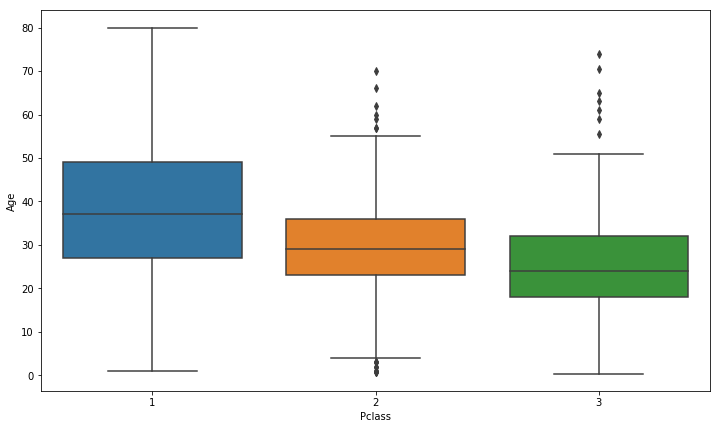

In [4]:
# Passenger: imputed with the average age by Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

df.groupby(by='Pclass').mean()

In [5]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [6]:
# Cabin: drop column
df.drop('Cabin',axis=1,inplace=True)
# Embark: dropna
df.dropna(inplace=True)
# Name, Ticket : drop column
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [7]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [7]:
df['Survived'].value_counts() #imbalanced classes-->stratify

0    549
1    340
Name: Survived, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


** Encode categorical features to dummy variables **

In [8]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


** Split Features & Class (or target) **

In [9]:
X = df.drop('Survived',axis=1).values
y = df['Survived'].values
print(X.shape,y.shape)

(889, 8) (889,)


** Split Train Test Sets **

In [10]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(711, 8) (178, 8) (711,) (178,)


In [12]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([439, 272], dtype=int64))

** Scale features **

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Model

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200,random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Original features:')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

Original features:
Accuracy of train set: 89.3%
Accuracy of test set: 84.8%


# 1. Principal Component Analysis (PCA)

PCA-applied features (PC1 & PC2):
Accuracy of train set: 87.6%
Accuracy of test set: 79.2%


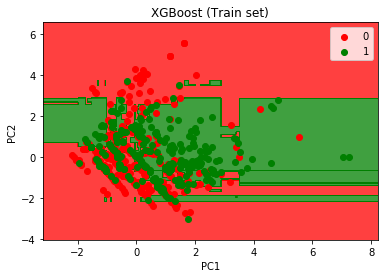

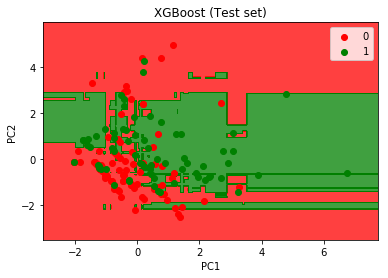

In [23]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Train the  model
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200,random_state=seed)
model.fit(X_train_pca, y_train)

# Evaluate the model
accuracy = model.score(X_train_pca, y_train)
print('PCA-applied features (PC1 & PC2):')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test_pca, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

# Visualize the results
#Train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('XGBoost (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#Test set
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('XGBoost (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# 2. Kernel PCA

Kernel PCA-applied features (KPC1 & KPC2):
Accuracy of train set: 86.8%
Accuracy of test set: 73.6%


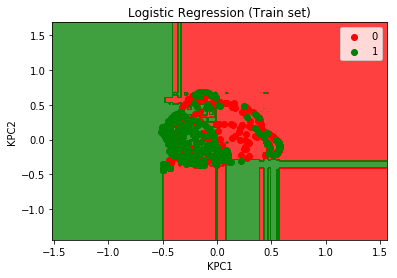

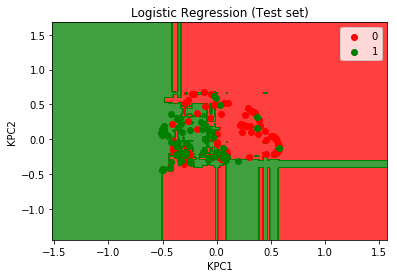

In [24]:
# Apply Keranl PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Train the  model
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200,random_state=seed)
model.fit(X_train_kpca, y_train)

# Evaluate the model
accuracy = model.score(X_train_kpca, y_train)
print('Kernel PCA-applied features (KPC1 & KPC2):')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test_kpca, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

# Visualize the results
#Train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()

#Test set
X_set, y_set = X_test_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()